In [1]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from env import sql_connexion
import env

from sklearn.model_selection import train_test_split

# import my functions
import wrangle_no_acquire
import explore_zillow_sfh_2017

# importing scalers to allow for scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from scipy.stats import pearsonr, spearmanr

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

In [2]:
# obtaining the data from the created .csv for zillow single-family homes 2017 

zil = pd.read_csv('zillow_single_family_properties_2017.csv')

In [3]:
# obtaining the prepared zillow data

zil = wrangle_no_acquire.prep_zillow(zil)

In [4]:
zil.head()
# what's in the cleaned dataframe

,no_br,no_ba,area_sqft,tax_value,year_built,tax_amount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0


In [5]:
zil.shape

# size of DataFrame

(2130214, 7)

In [6]:
zil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2130214 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   no_br       float64
 1   no_ba       float64
 2   area_sqft   float64
 3   tax_value   float64
 4   year_built  float64
 5   tax_amount  float64
 6   fips        float64
dtypes: float64(7)
memory usage: 130.0 MB


**Continuous variables : area_sqft, tax_value, tax_amount.**  
**Discrete variables : no_br, no_ba, year_built, fips.**

**Tax_value will be the target variable (y-axis).**

In [7]:
# list of continuous variables

con_vars = ['area_sqft', 'tax_value', 'tax_amount']

In [8]:
# list of discrete variables

disc_vars = ['no_br', 'no_ba', 'year_built', 'fips']

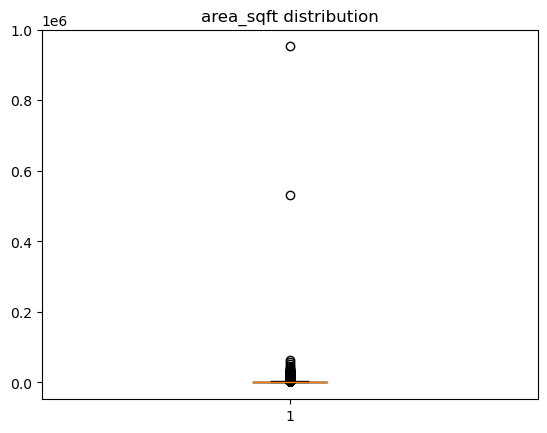

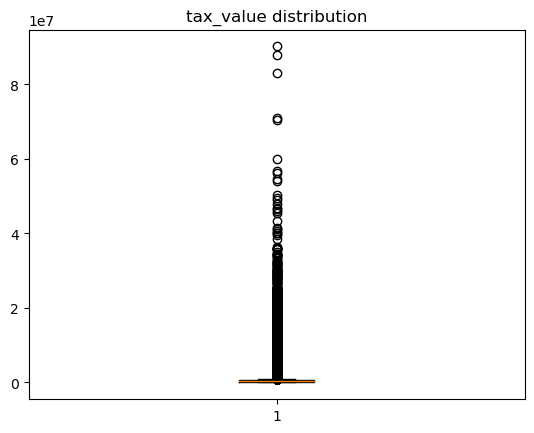

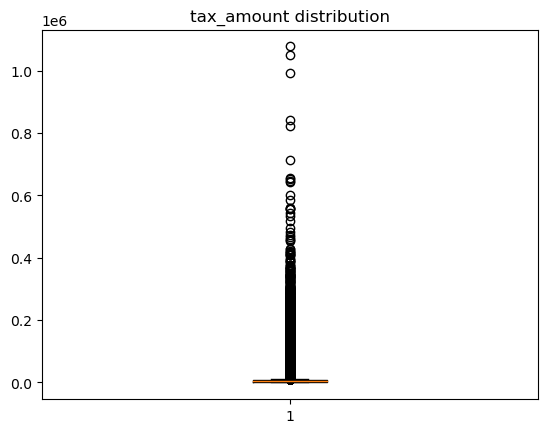

In [9]:
# looking at the continuous variables using boxplots

for col in con_vars:
    
    plt.boxplot(zil[col])
    plt.title(f'{col} distribution')
    plt.show()

**There are some major outliers in 'area_sqft', 'tax_value', 'tax_amount'.**

In [10]:
## looking at area_sqft outliers

zil[zil.area_sqft > 14_000]

# 350 outliers

,no_br,no_ba,area_sqft,tax_value,year_built,tax_amount,fips
13992,5.0,13.0,19335.0,10904781.0,1997.0,131646.20,6037.0
21288,6.0,10.0,15031.0,3352431.0,2006.0,34947.72,6059.0
22216,8.0,1.5,20433.0,5310449.0,1997.0,56058.04,6111.0
24710,4.0,7.0,14342.0,19129816.0,2002.0,228999.21,6037.0
32114,10.0,19.5,26345.0,11689668.0,1981.0,369.08,6059.0
...,...,...,...,...,...,...,...
2134701,8.0,12.0,16152.0,17000000.0,2009.0,203513.62,6037.0
2135273,10.0,19.0,31415.0,6401936.0,1991.0,73571.72,6037.0
2138637,10.0,16.0,19803.0,4197539.0,2000.0,55454.21,6037.0
2141564,10.0,11.0,20281.0,4073278.0,2001.0,45903.84,6037.0


In [11]:
## looking at tax_value outliers

zil[zil.tax_value > 6_000_000]

# 3301 outliers

,no_br,no_ba,area_sqft,tax_value,year_built,tax_amount,fips
848,8.0,10.0,13875.0,9094608.0,1994.0,102053.65,6037.0
3173,3.0,6.0,6830.0,6564287.0,1926.0,76318.79,6037.0
3250,4.0,5.0,4182.0,6193025.0,1932.0,74298.50,6037.0
3277,6.0,7.0,9572.0,9319811.0,2013.0,111681.59,6037.0
3312,7.0,11.0,11810.0,30166843.0,1980.0,342940.38,6037.0
...,...,...,...,...,...,...,...
2152283,5.0,5.5,5158.0,6834528.0,2001.0,73455.50,6059.0
2152516,6.0,7.0,8366.0,8077170.0,2007.0,89822.78,6059.0
2152680,4.0,5.0,3268.0,10072789.0,2005.0,114773.89,6037.0
2152717,5.0,9.0,24920.0,12871608.0,2002.0,155058.86,6037.0


In [12]:
## looking at tax_amount outliers

zil[zil.tax_amount > 70_000]

# 3814 outliers

,no_br,no_ba,area_sqft,tax_value,year_built,tax_amount,fips
848,8.0,10.0,13875.0,9094608.0,1994.0,102053.65,6037.0
3173,3.0,6.0,6830.0,6564287.0,1926.0,76318.79,6037.0
3209,5.0,7.0,6771.0,5888214.0,2008.0,70970.74,6037.0
3250,4.0,5.0,4182.0,6193025.0,1932.0,74298.50,6037.0
3277,6.0,7.0,9572.0,9319811.0,2013.0,111681.59,6037.0
...,...,...,...,...,...,...,...
2152283,5.0,5.5,5158.0,6834528.0,2001.0,73455.50,6059.0
2152516,6.0,7.0,8366.0,8077170.0,2007.0,89822.78,6059.0
2152680,4.0,5.0,3268.0,10072789.0,2005.0,114773.89,6037.0
2152717,5.0,9.0,24920.0,12871608.0,2002.0,155058.86,6037.0


In [13]:
# getting rid of area_sqft outliers

zil = zil[zil.area_sqft < 10_000]
zil

# 2128514 rows

,no_br,no_ba,area_sqft,tax_value,year_built,tax_amount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0
...,...,...,...,...,...,...,...
2152855,3.0,2.5,1809.0,405547.0,2012.0,4181.10,6059.0
2152856,4.0,4.0,4375.0,422400.0,2015.0,13877.56,6037.0
2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0


In [14]:
# getting rid of tax_value outliers

zil = zil[zil.tax_value <=  5_000_000]
zil

# 2123847 rows

,no_br,no_ba,area_sqft,tax_value,year_built,tax_amount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0
...,...,...,...,...,...,...,...
2152855,3.0,2.5,1809.0,405547.0,2012.0,4181.10,6059.0
2152856,4.0,4.0,4375.0,422400.0,2015.0,13877.56,6037.0
2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0


In [15]:
# getting rid of tax_amount outliers

zil = zil[zil.tax_amount <=  65_000]
zil

# 2123817 rows

,no_br,no_ba,area_sqft,tax_value,year_built,tax_amount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0
...,...,...,...,...,...,...,...
2152855,3.0,2.5,1809.0,405547.0,2012.0,4181.10,6059.0
2152856,4.0,4.0,4375.0,422400.0,2015.0,13877.56,6037.0
2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0


In [16]:
# shape after outliers removed

zil.shape

(2123817, 7)

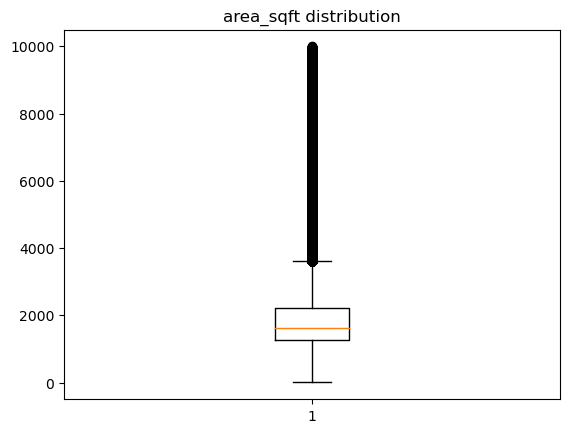

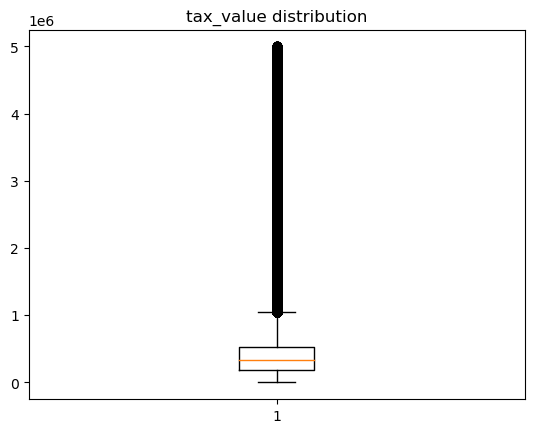

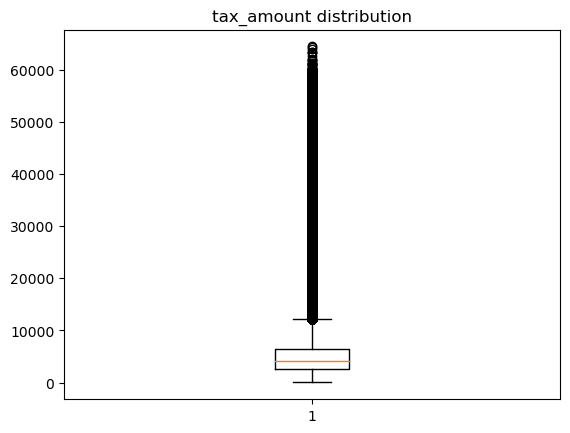

In [17]:

# looking at the continuous variables using boxplots AFTER REMOVAL OF OUTLIERS

for col in con_vars:
    
    plt.boxplot(zil[col])
    plt.title(f'{col} distribution')
    plt.show()

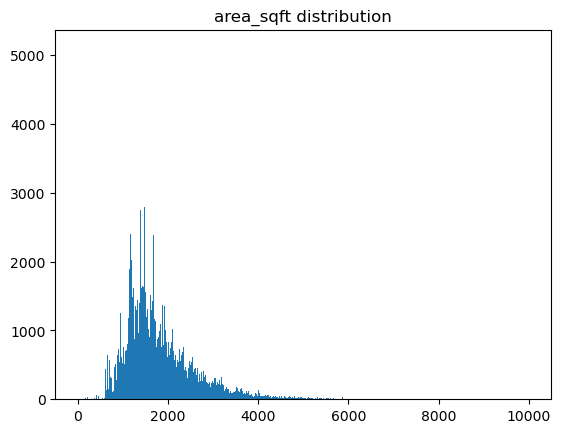

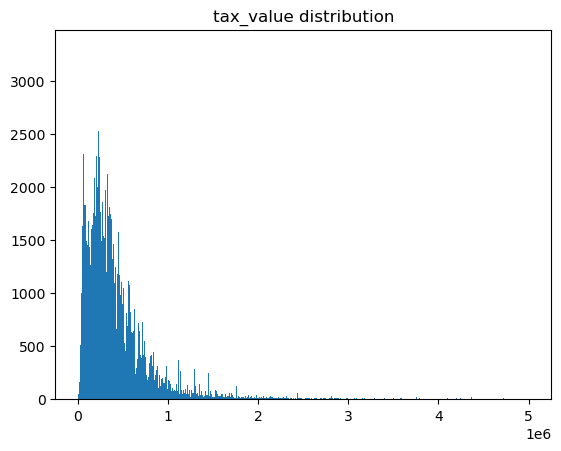

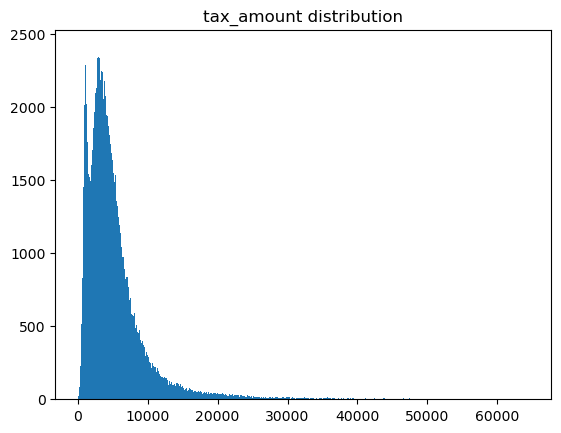

In [18]:
# looking at the continuous variables using histograms

for col in con_vars:
    
    plt.hist(zil[col], bins = 10000)
    plt.title(f'{col} distribution')
    plt.show()


**The distribution appears relatively normal for area_sqft, while tax_value and tax_amount are more right-skewed but still relatively normal.**

**_Note_ : I went through and graphed the data at different outlier levels, and decided on the current ones as accounting for the presence of the fact of outliers, but without them totally skewing the entire dataset.**

### Exercise 3 : Write a function named ```plot_variable_pairs``` that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

1. split into train, val, test
2. do .corr on training dataset
3. make LMPLOTS of the data

In [19]:
# # splitting acquired and prepared Zillow data into train, validate, test

train, validate, test = wrangle_no_acquire.tts_zillow(zil)

train.shape, validate.shape, test.shape

((1189337, 7), (509716, 7), (424764, 7))

In [20]:
# the .corr will by default use Pearson's R : desireable when data is normally distributed

# this computes pairwise correlation of columns

train_corr = train[con_vars].corr()
train_corr


,area_sqft,tax_value,tax_amount
area_sqft,1.000000,0.632347,0.630847
tax_value,0.632347,1.000000,0.986537
tax_amount,0.630847,0.986537,1.000000


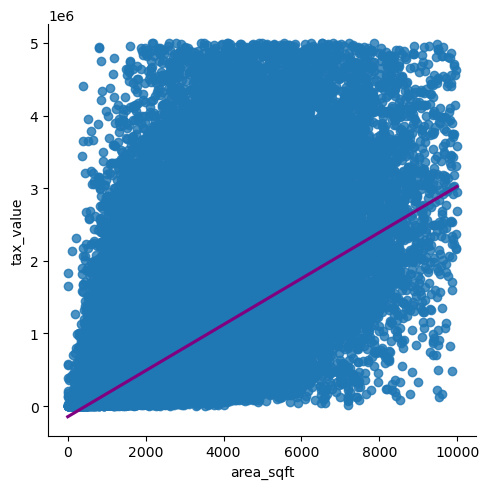

In [21]:
# plot the 'area_sqft' against target variable 'tax_value'

sns.lmplot(x = 'area_sqft', y = 'tax_value', data = train, line_kws={'color': 'purple'})


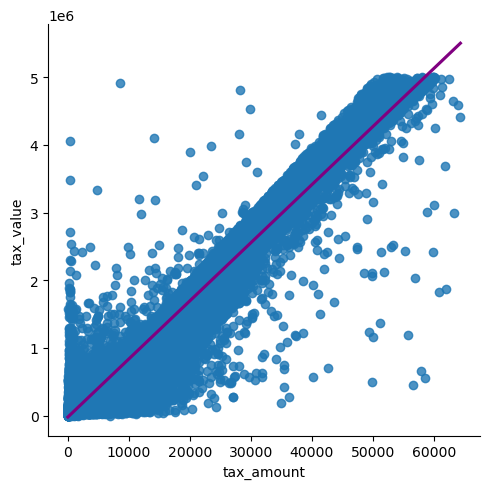

In [22]:
# plot the 'tax_amount' against target variable 'tax_value'

sns.lmplot(x = 'tax_amount', y = 'tax_value', data = train, line_kws={'color': 'purple'})


In [23]:
# # just for fun...

# # Create a dictionary mapping subgroup values to colors
# palette_colors = {"Rural": "green", "Urban": "blue"}

# # Create a count plot of school with location subgroups
# sns.countplot(x="school", data=student_data, hue="location", palette=palette_colors)

# # Display plot
# plt.show()


In [24]:
# a function named 'plot_variable_pairs' that accepts a dataframe as input and plots all 
# of the pairwise relationships along with the regression line for each pair.


def plot_con_variable_pairs(zil):
    
    for col in zil:
        sns.lmplot(x = col, y = 'tax_amount', data = train.sample(n = 12000), line_kws = {'color': 'purple'})
        plt.title(f'{col} distribution')
        plt.show()

        # zil acts as a placeholder for an object, which is replaced with the variable name below.

In [25]:
train.sample(n = 12000).head()

# how to pull random samples from train

,no_br,no_ba,area_sqft,tax_value,year_built,tax_amount,fips
1388410,5.0,4.5,4165.0,1135312.0,1999.0,12612.20,6059.0
1613335,4.0,2.0,1919.0,603336.0,1971.0,6907.38,6059.0
1508762,3.0,2.0,1238.0,371704.0,1953.0,4565.53,6037.0
407728,4.0,2.0,1576.0,435127.0,1973.0,4739.98,6059.0
1740963,3.0,1.0,1549.0,227987.0,1949.0,2811.32,6059.0


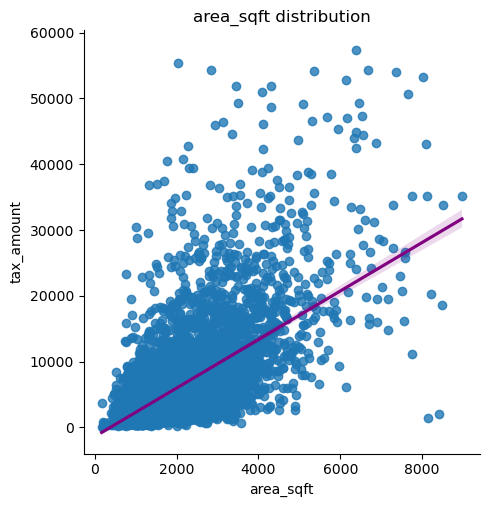

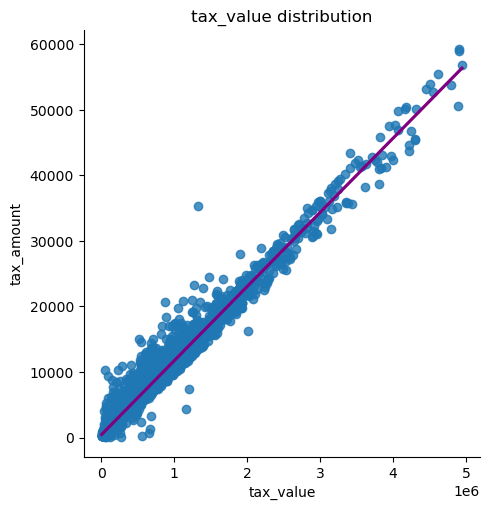

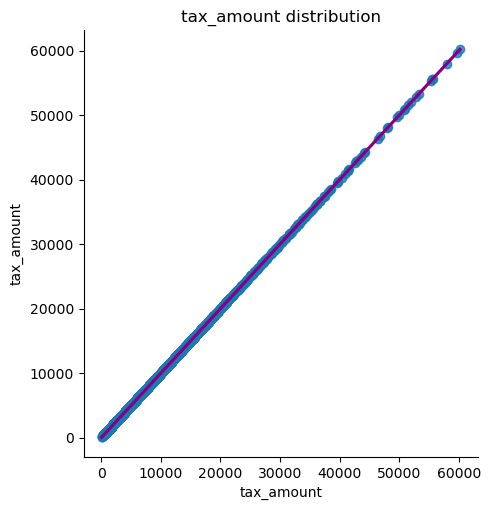

In [26]:
# visualising the function

plot_con_variable_pairs(con_vars)

**Here, we see that area_sqft is spread widely across the chart, but that the distribution line is still relatively centred to tax_amount.  
As to tax_value, it is visible that it corresponds highly to tax_amount.**

### Exercise 4 : Write a function named ```plot_categorical_and_continuous_vars``` that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [27]:
print(disc_vars)

['no_br', 'no_ba', 'year_built', 'fips']


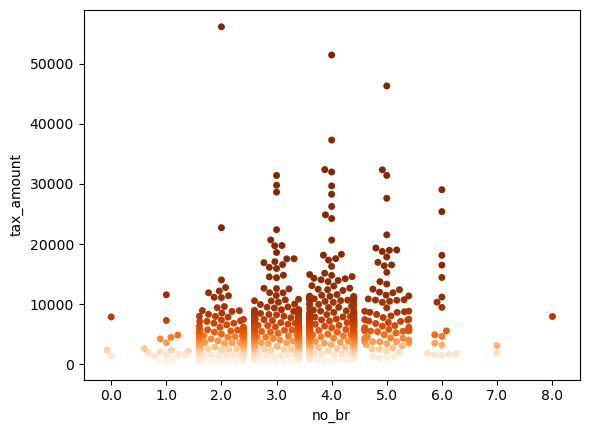

In [28]:
# comparing discrete variable against the target variable of 'tax_amount'

sns.swarmplot(x = 'no_br', y = 'tax_amount', data = train.sample(n = 1200), 
              hue = 'tax_amount', palette = 'Oranges')

# removing the legend

plt.legend([],[], frameon = False)

In [29]:
# a function named 'plot_categorical_and_continuous_vars' that accepts a dataframe 
# as input and plots the categorical / discrete variables against the continuous 
# target variable of 'tax_amount'.

def plot_categorical_and_continuous_vars(zil):
    
    for col in zil:
        sns.swarmplot(x = col, y = 'tax_amount', data = train.sample(n = 900), 
               hue = 'tax_amount', palette = 'Oranges')
        
        # removing the legend
        plt.legend([],[], frameon = False)

        plt.title(f'{col} distribution')
                  
        plt.show()

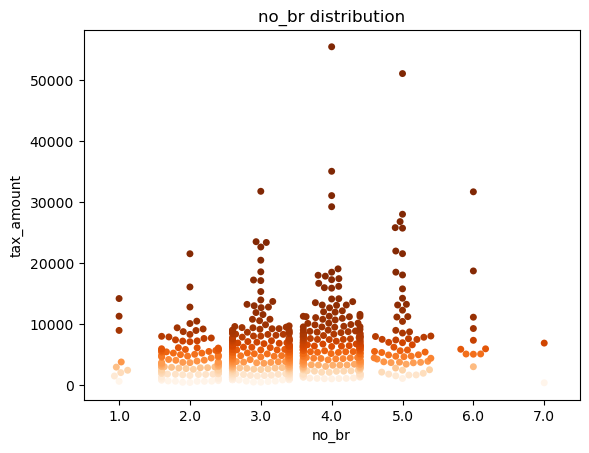

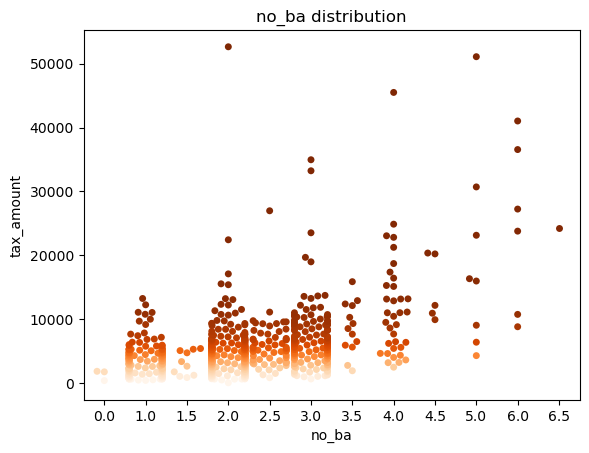

KeyboardInterrupt: 

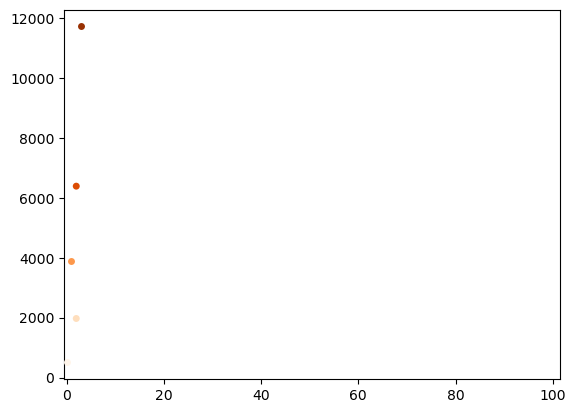

In [30]:
# plotting the discrete variables using the function 'plot_categorical_and_continuous_vars(zil)'.

plot_categorical_and_continuous_vars(disc_vars)

# stopped this cell's running because 5 minutes is too long to wait

### Exercise 6 : Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

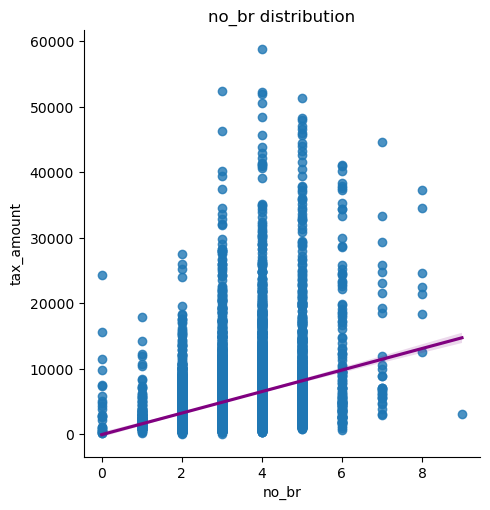

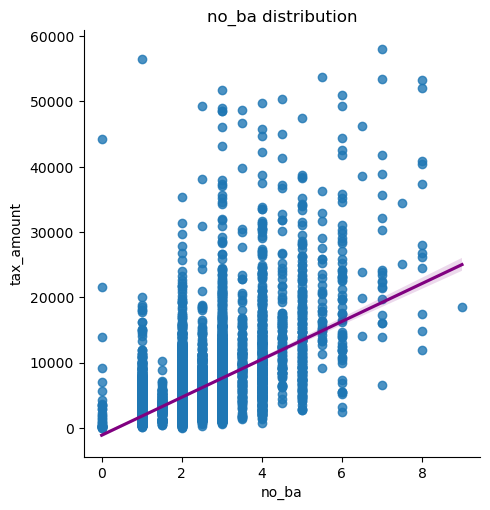

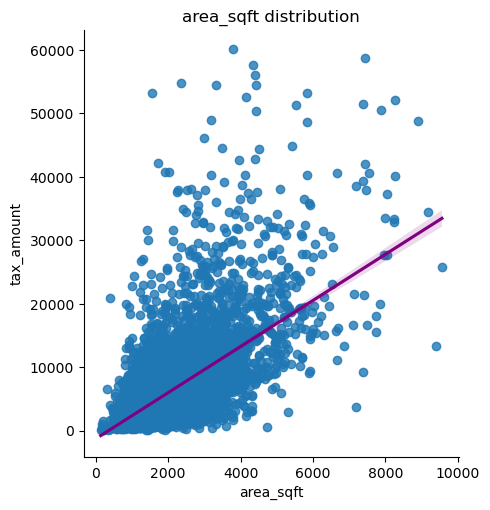

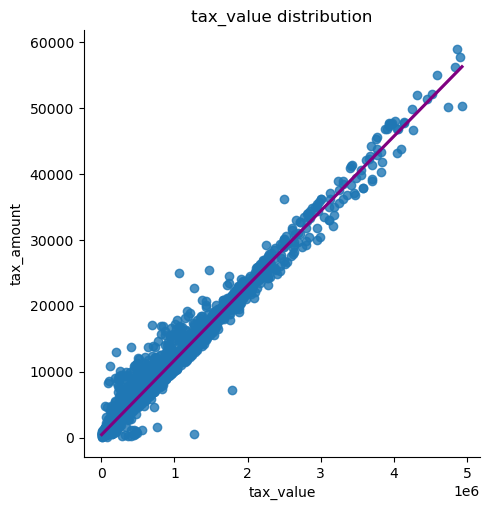

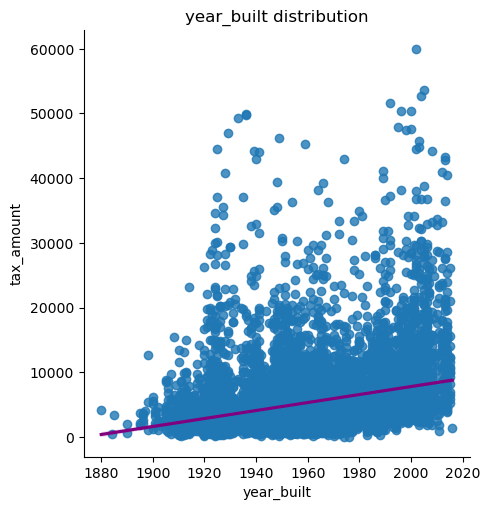

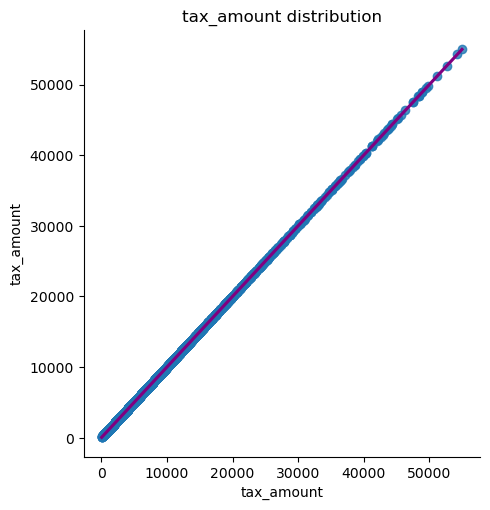

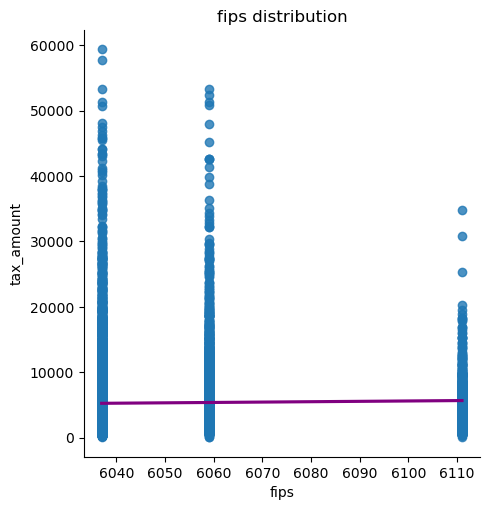

In [31]:
# checking to see if the continuous-continuous function previously created work when imported

explore_zillow_sfh_2017.plot_con_variable_pairs(train)

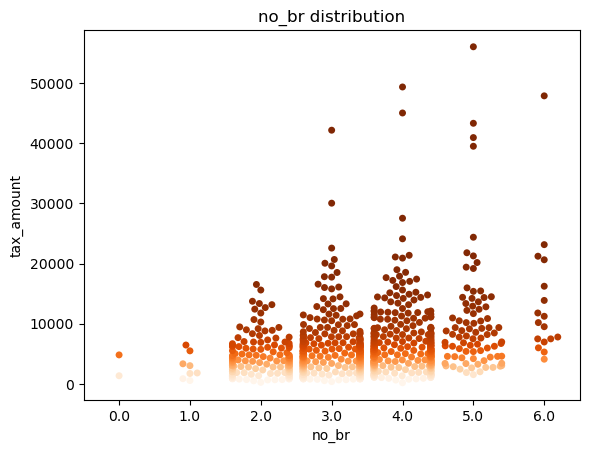

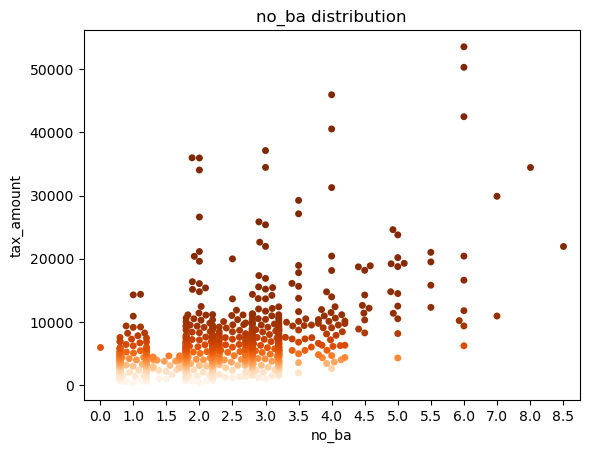

KeyboardInterrupt: 

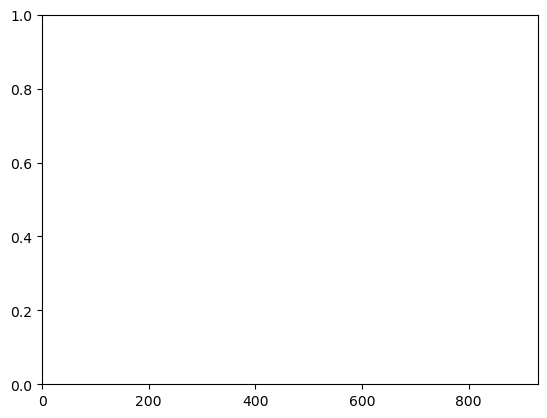

In [32]:
# checking to see if the discrete-continuous function previously created work when imported

explore_zillow_sfh_2017.plot_categorical_and_continuous_vars(train)

# stopped this cell's running because 5 minutes is too long to wait for the final chart.